# T4 - People, populations, and networks

This tutorial gives a brief introduction to people, populations, and contact layers.

<div class="alert alert-info">
    
Click [here](https://mybinder.org/v2/gh/institutefordiseasemodeling/hpvsim/HEAD?urlpath=lab%2Ftree%2Fdocs%2Ftutorials%2Ftut_people.ipynb) to open an interactive version of this notebook.
    
</div>

## Demographic data

HPVsim includes pre-downloaded demographic data for almost all countries, including:

 * Population sizes from 1950-2100 from the UN's World Population Projections;
 * Birth rates from 1950-2100 from the World Bank;
 * Age- and sex-specific mortality rates from 1950-2100 from the UN's World Population Projections.

 As we saw in Tutorial 1, you can load these data simply by using the `location` parameter. You can show a list of all available locations with `hpv.data.show_locations()`.

## People and contact network layers

Agents in HPVsim are contained in an object called `People`, which contains all of the agents' properties, as well as methods for changing them from one state to another (e.g., from susceptible to infected).

HPV transmits via sexual contact, and in HPVsim this is represented by sexual networks that allow agents to interact with one another. For the moment, HPVsim only models heterosexual partnerships. The sexual contact networks in HPVsim can have multiple *contact layers*, with each layer having different properties that characterize sexual contact, including the duration of the contact, age mixing preferences of partners, etc. HPVsim comes with two options for the sexual network:

* The *random* option has a single contact layer. The number of partners that each agent has is Poisson distributed with a mean of 1.
* The *default* option has 3 contact layers, representing marital, casual, and one-off partnership types.

## Assortative mixing

By default, new partnerships are formed based on age mixing patterns. There is an optional additional dimension of assortative mixing that could be used to represent geographical location or other demographic groups.

To enable the additional mixing, user needs to specify additional parameters that define 1) the number of clusters to use `n_clusters`; 2) a mixing matrix `add_mixing` that specifies pair-wise relative mixing weights between clusters, or a list of relative mixing weights by cluster distance (`mixing_steps`).


Loading location-specific demographic data for "nigeria"
Loading location-specific demographic data for "nigeria"
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
Loading location-specific demographic data for "nigeria"
[[1.   0.5  0.01 0.   0.   0.   0.   0.   0.   0.  ]
 [0.5  1.   0.5  0.01 0.   0.   0.   0.   0.   0.  ]
 [0.01 0.5  1.   0.5  0.01 0.   0.   0.   0.   0.  ]
 [0.   0.01 0.5  1.   0.5  0.01 0.   0.   0.   0.  ]
 [0.   0.   0.01 0.5  1.   0.5  0.01 0.   0.   0.  ]
 [0.   0.   0.   0.01 0.5  1.   0.5  0.01 0.   0.  ]
 [0.   0.   0.   0.   0.01 0.5  1.   0.5  0.01 0.  ]
 [0.   0.   0.   0.   0.   0.01 0.5  1.   0.5  0.01]
 [0.   0.   0.   0.   0.   0.   0.01 0.5  1.   0.5 ]
 [0.   0.   0.   0.  

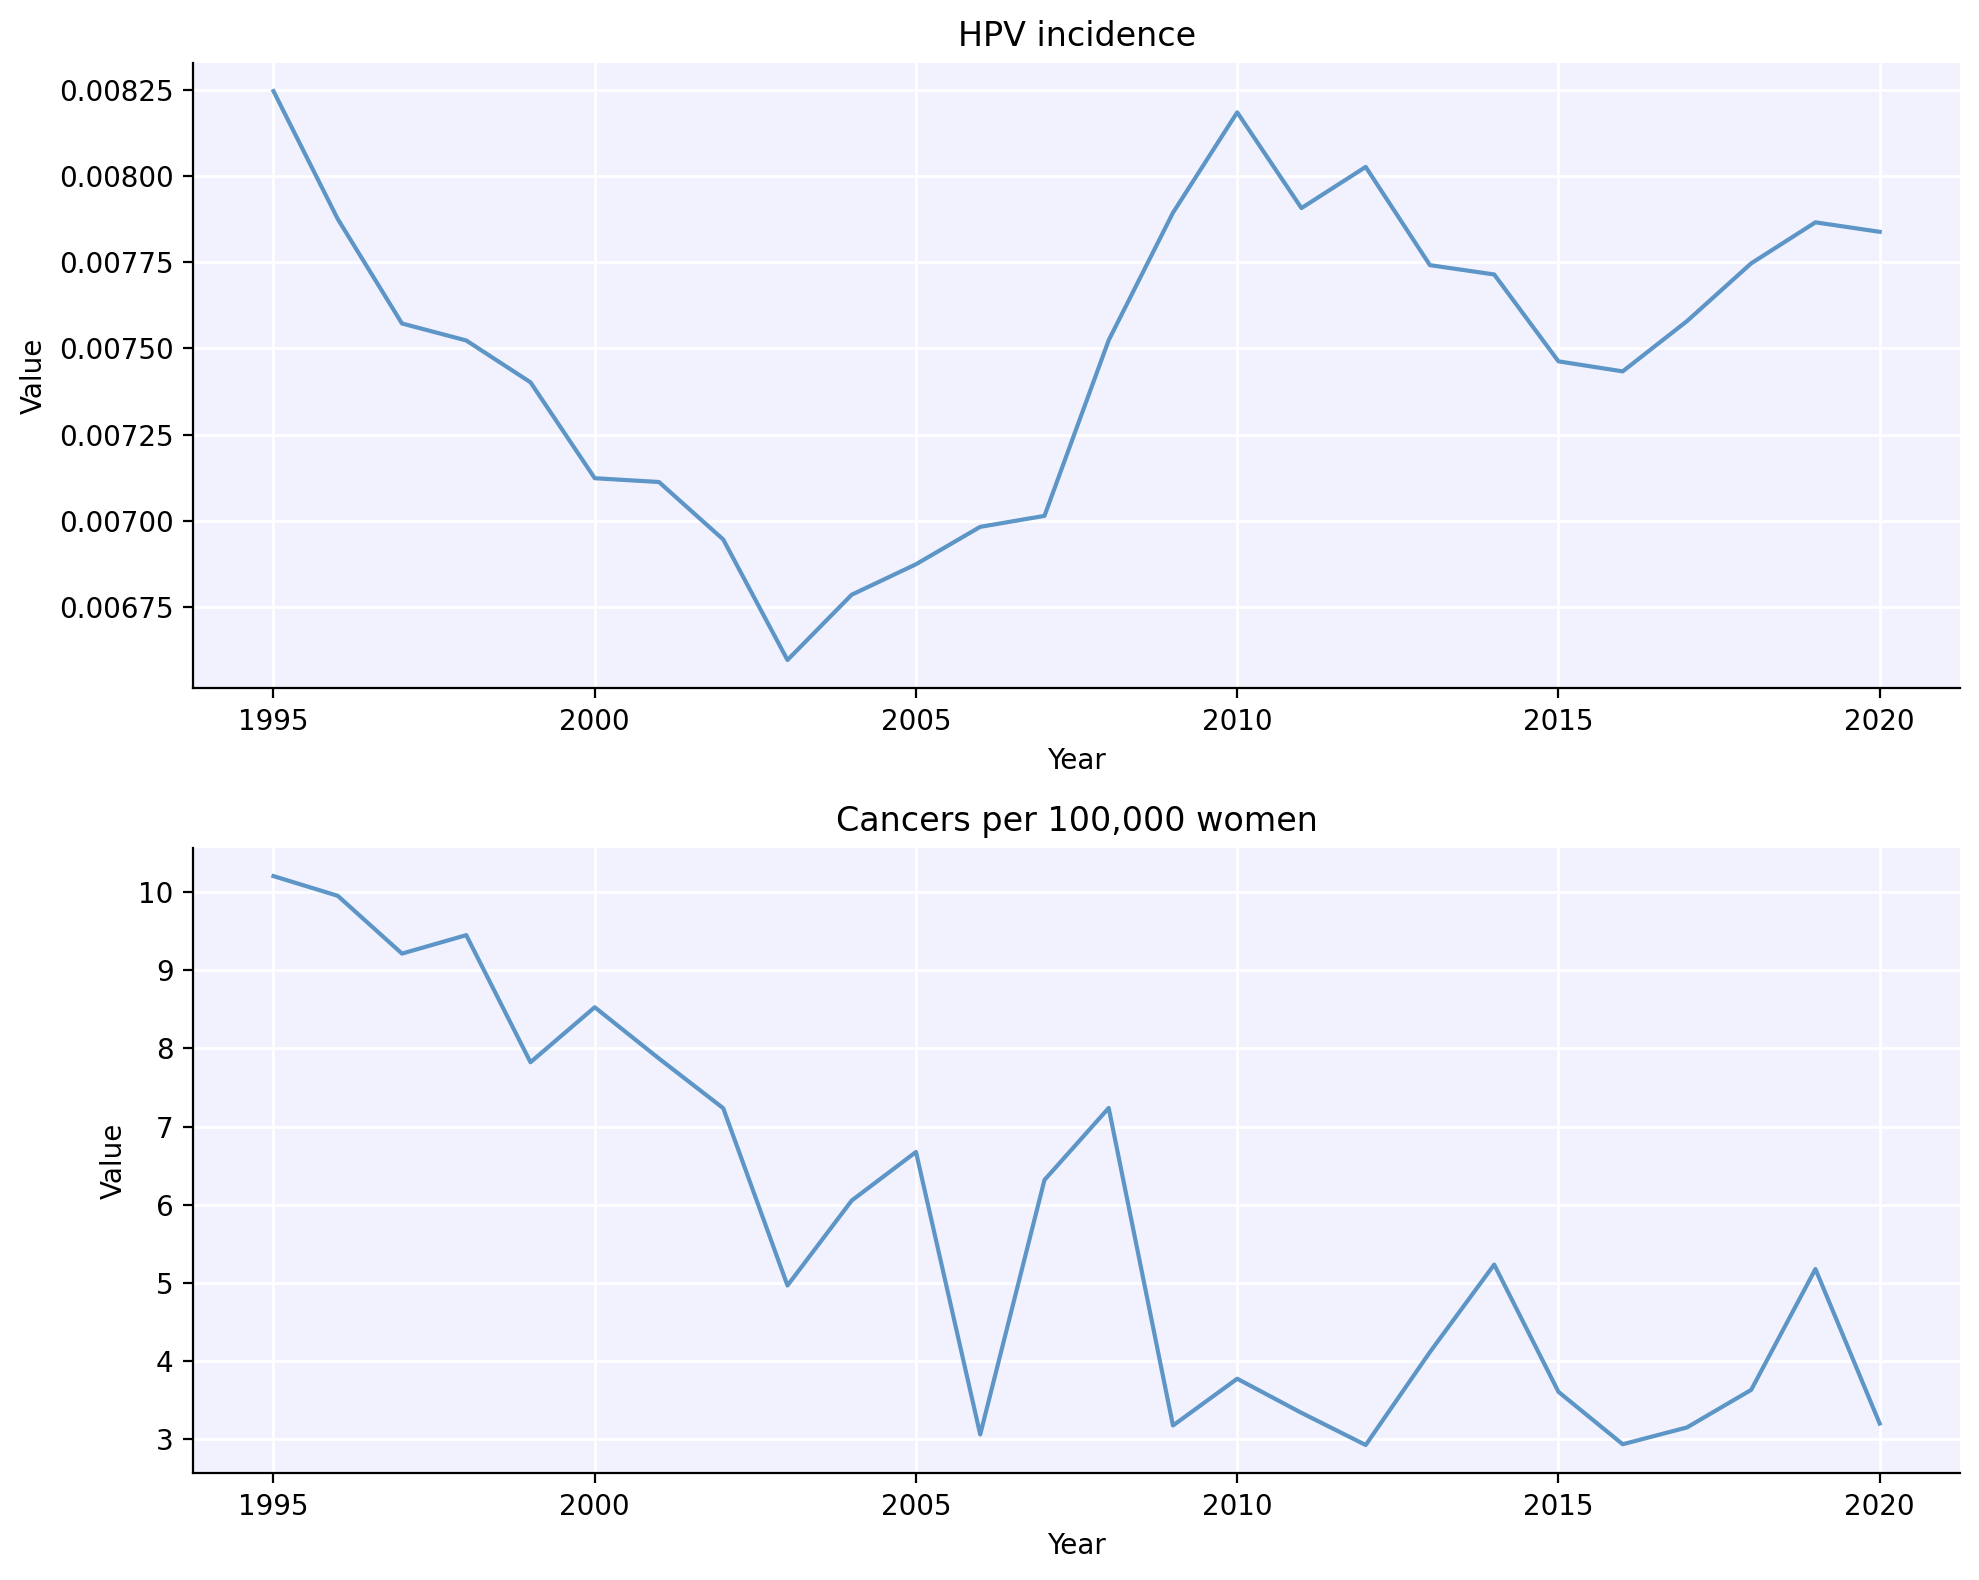

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

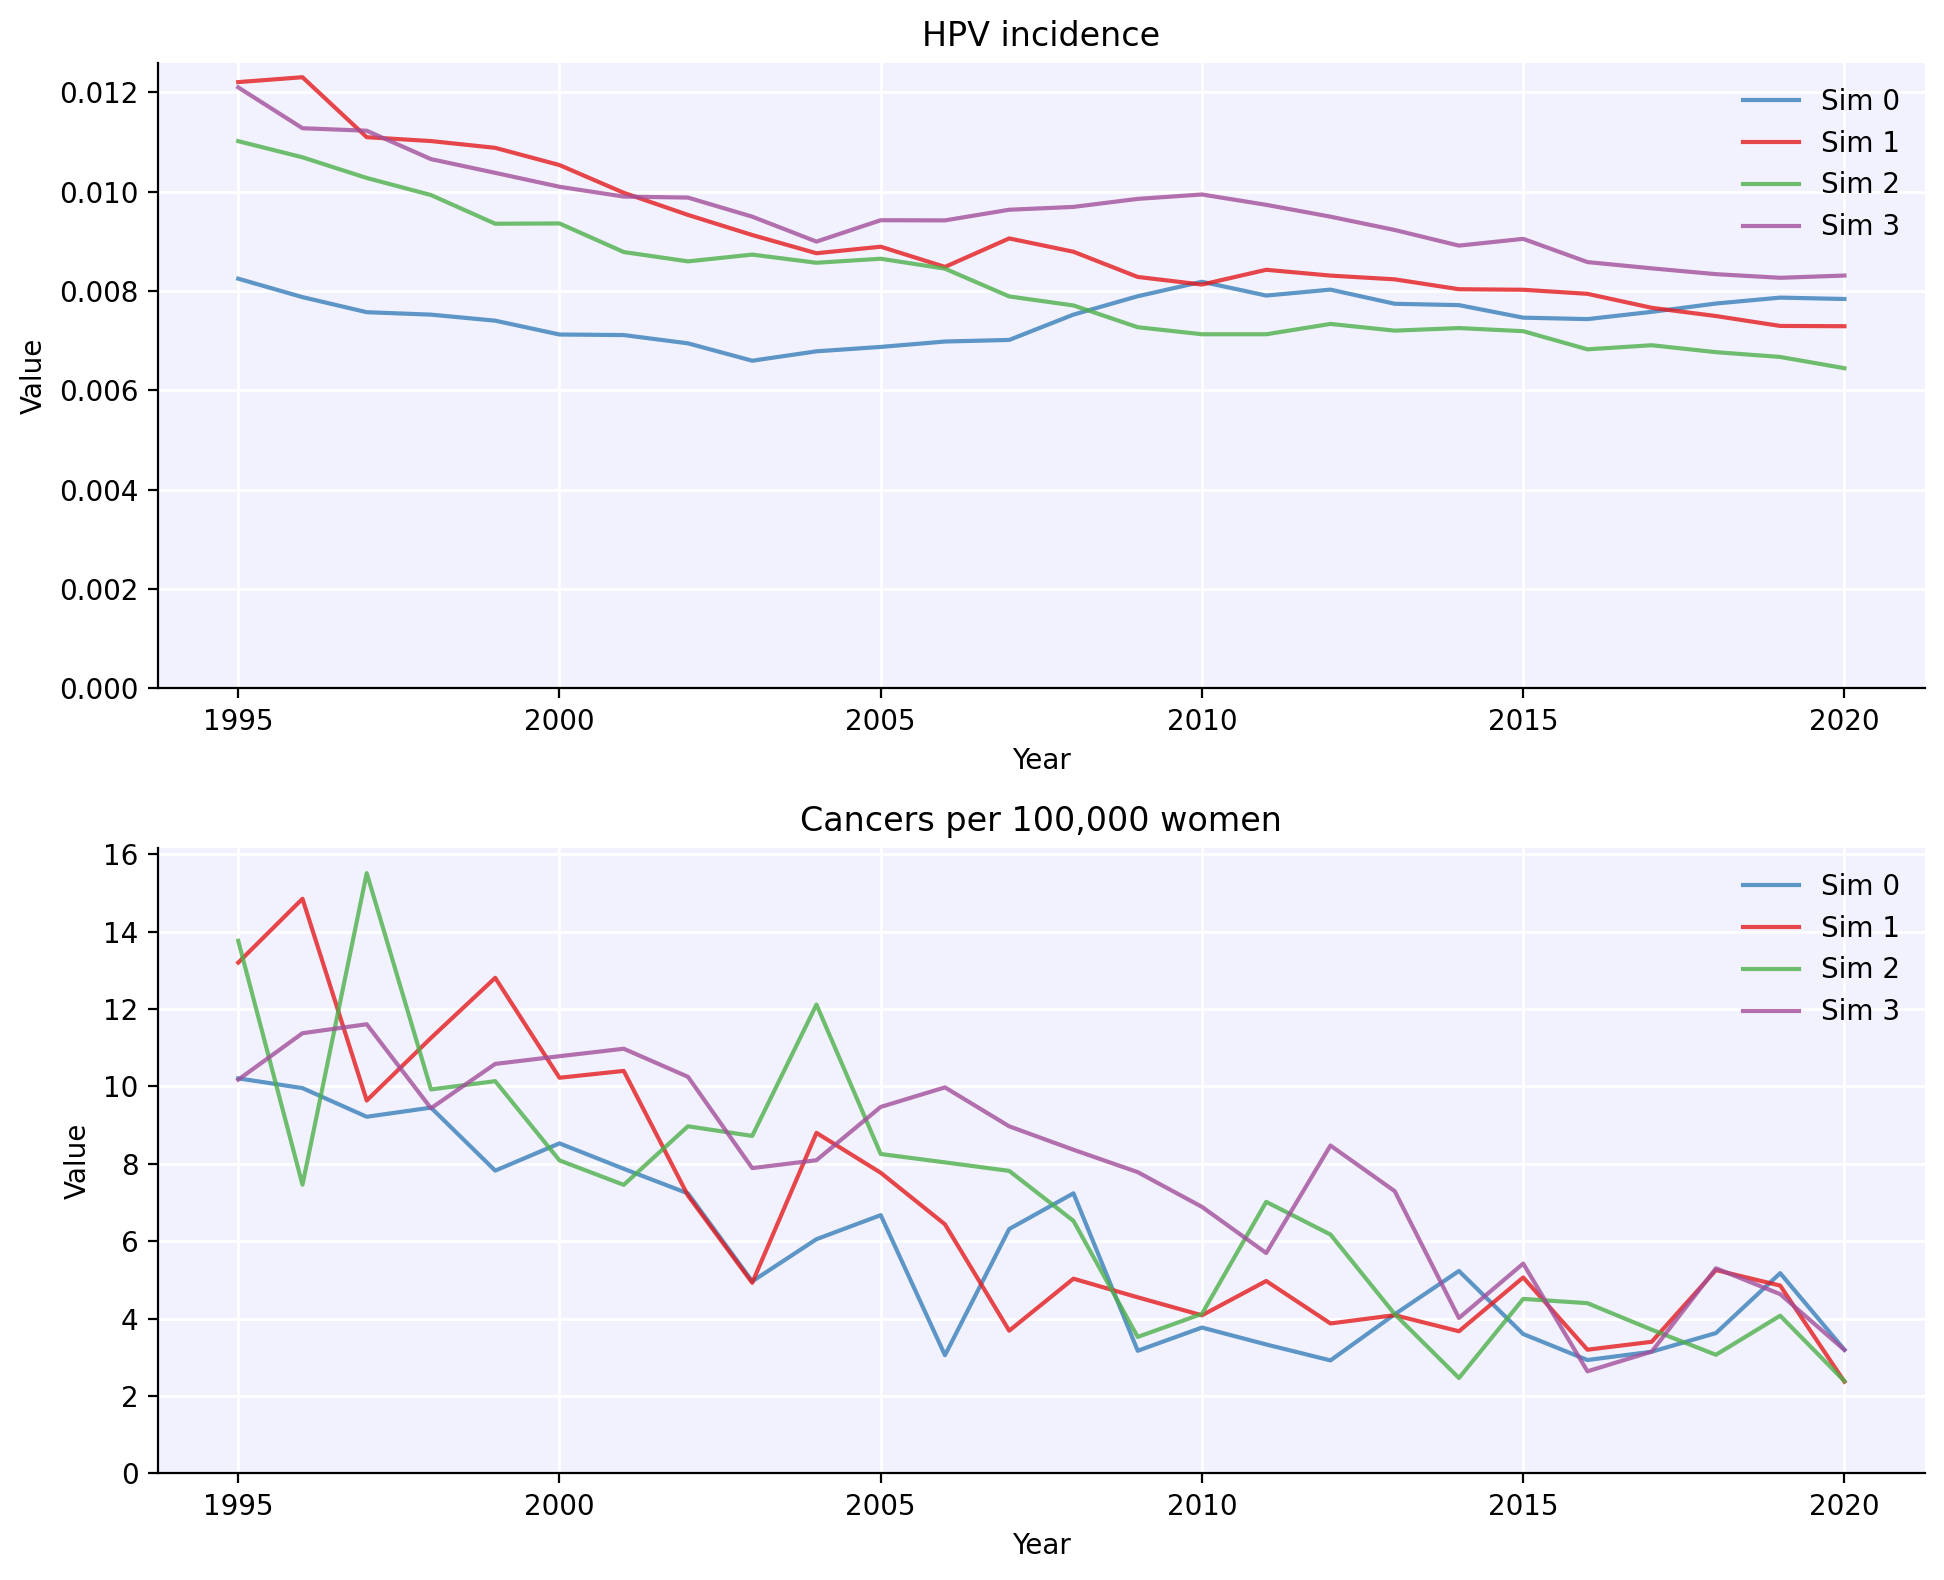

In [5]:
import sciris as sc
import numpy as np
import hpvsim as hpv

hpv.options(jupyter=True, verbose=False)

base_pars = {
    'n_agents': 2e4,
    'start': 1970,
    'end': 2020,
    'location': 'nigeria',
    'rand_seed': 1,
}

# Default: well-mixed (1 cluster)
sim0 = hpv.Sim(pars=base_pars)
assert sim0['n_clusters'] == 1

# Multiple clusters but well-mixed
pars1 = sc.dcp(base_pars)
pars1['n_clusters'] = 10 # create 10 clusters
pars1['mixing_steps'] = np.repeat(1,9) # set all between-cluster mixing to the same as within-cluster mixing
sim1 = hpv.Sim(pars=pars1)
print(sim1['add_mixing']) # print actual mixing matrix

# Modifying mixing steps
pars2 = sc.dcp(pars1)
pars2['mixing_steps'] = [0.5, 0.01] # diagonal is 1 by default, set relative mixing at 0.5 for adjacent clusters, 0.01 for clusters at distance = 2, 0 for clusters further apart
sim2 = hpv.Sim(pars=pars2)
print(sim2['add_mixing']) # print actual mixing matrix

# Directly specifying mixing matrix
pars3 = sc.dcp(base_pars)
pars3['n_clusters'] = 3 # create 3 clusters
pars3['add_mixing'] = np.array([[1, 0, 0],
                               [0, 1, 0],
                               [0, 0, 1]]) # No between-cluster mixing
sim3 = hpv.Sim(pars=pars3)

msim = hpv.parallel(sim0, sim1, sim2, sim3)
msim.plot()